In [0]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import tensorflow as tf
import warnings


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

1. Formatting and Normalization

In [0]:
x_train = x_train[:50000]
y_train = y_train[:50000]

x_train = x_train.reshape(50000, 784)
x_test = x_test.reshape(10000, 784)

y_test[y_test  < 5]  = 0
y_test[y_test > 4] = 1
y_train[y_train < 5]  = 0
y_train[y_train > 4] = 1


In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
x_train  = (x_train - np.mean(x_train, 0))/ np.std(x_train, 0)
x_train[np.isnan(x_train)] = 0

x_test =  (x_test - np.mean(x_test, 0))/ np.std(x_test, 0)
x_test[np.isnan(x_test)] = 0
x_test[np.isinf(x_test)] = 0

x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1), dtype=x_train.dtype)))
x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1), dtype=x_test.dtype)))


In [0]:
#Q3
def add_bias(x):
    return np.concatenate([x,np.ones((x.shape[0],1))],1)

def relu(x):
    return np.maximum(x,0)

def predict(w,u,x):
    return w.dot(relu(u.dot(x)))

def get_grad(w,u,y,x):
    h=relu(u.dot(x))
    sigmap=u.dot(x)>0+0.
    yh=predict(w,u,x)
    r=yh-y
    grad_w=r*h
    grad_u=r*np.outer(w*sigmap,x)
    return grad_w,grad_u

def loss(w,u,y,x):
    return npl.norm(y-predict(w,u,x))**2

def sigmoid(x):
  return 1/(1 + np.exp(-x))

#Q4
def predict_log_loss(w,u,x):
    return sigmoid(w.dot(relu(u.dot(x))))

def log_loss(w, u, x, y):
  h = sigmoid(w.dot(relu(u.dot(x))))
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


def get_grad_logistic( w, u, y,  x):
  y_dash = 2*y - 1
  first_layer = relu(u.dot(x))
  yh = w.dot(relu(u.dot(x)))
  sigmap=u.dot(x)>0+0
  grad_w = -(y_dash * first_layer * sigmoid(yh) * (1 -sigmoid(yh)))/(1 + np.exp(y_dash * yh))
  grad_u = -(y_dash  * sigmoid(yh) * (1 -sigmoid(yh)) * np.outer(w*sigmap,x))/ (1 + np.exp(y_dash * yh))
  return grad_w,grad_u


##3. neural network classifier with σ(x) = x : Quadratic Loss


For k=5:

In [0]:
train_acc = []
test_acc = []

k= 5  
d= 785 
w = np.random.normal(0, 0.01, k)
u = np.random.normal(0, 1/k, k*d).reshape(k,d)
N = 50000
learning_rate= 0.0001  

iteration_number= 5
for it in range(iteration_number):
    grad_w=0
    grad_u=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)
    for i in indices:
        gw,gu=get_grad(w,u,y_train[i],x_train[i])
        grad_w=gw
        grad_u=gu
        w=w-learning_rate*grad_w
        u=u-learning_rate*grad_u
        if(i % 1000 == 0):
          y_hat_test=predict(w,u,x_test.T)>0.5+0
          y_hat_train = predict(w,u,x_train.T)>0.5+0
          train_acc.append(accuracy_score(y_hat_train, y_train ))
          test_acc.append(accuracy_score(y_hat_test, y_test ))

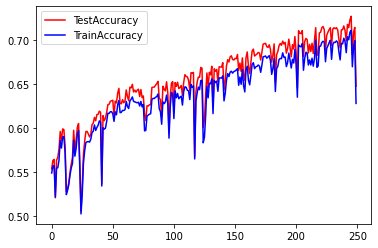

In [45]:
#Test and Train Accuracy
import matplotlib.pyplot as plt
plt.figure()
a = plt.subplot(111)
a.plot(test_acc,'r',label="TestAccuracy")
a.plot(train_acc, 'b',label="TrainAccuracy")
a.legend()
plt.show()

For k=40:

In [0]:
train_acc = []
test_acc = []

k= 40
d= 785 
w = np.random.normal(0, 0.01, k)
u = np.random.normal(0, 1/k, k*d).reshape(k,d)
N = 50000
learning_rate= 0.0001  

iteration_number= 5
for it in range(iteration_number):
    grad_w=0
    grad_u=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)
    for i in indices:
        gw,gu=get_grad(w,u,y_train[i],x_train[i])
        grad_w=gw
        grad_u=gu
        w=w-learning_rate*grad_w
        u=u-learning_rate*grad_u
        if(i % 1000 == 0):
          y_hat_test=predict(w,u,x_test.T)>0.5+0
          y_hat_train = predict(w,u,x_train.T)>0.5+0
          train_acc.append(accuracy_score(y_hat_train, y_train ))
          test_acc.append(accuracy_score(y_hat_test, y_test ))

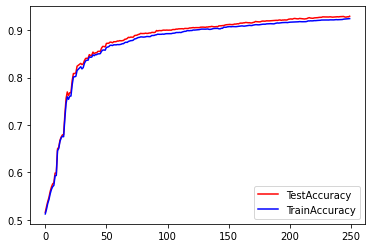

In [38]:
#Test and Train Accuracy
import matplotlib.pyplot as plt
plt.figure()
a = plt.subplot(111)
a.plot(test_acc,'r',label="TestAccuracy")
a.plot(train_acc, 'b',label="TrainAccuracy")
a.legend()
plt.show()

For K=200:

In [0]:
train_acc = []
test_acc = []

k= 200
d= 785 
w = np.random.normal(0, 0.01, k)
u = np.random.normal(0, 1/k, k*d).reshape(k,d)
N = 50000
learning_rate= 0.0001  

iteration_number= 5
for it in range(iteration_number):
    grad_w=0
    grad_u=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)
    for i in indices:
        gw,gu=get_grad(w,u,y_train[i],x_train[i])
        grad_w=gw
        grad_u=gu
        w=w-learning_rate*grad_w
        u=u-learning_rate*grad_u
        if(i % 1000 == 0):
          y_hat_test=predict(w,u,x_test.T)>0.5+0
          y_hat_train = predict(w,u,x_train.T)>0.5+0
          train_acc.append(accuracy_score(y_hat_train, y_train ))
          test_acc.append(accuracy_score(y_hat_test, y_test ))

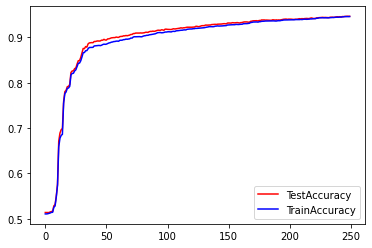

In [40]:
#Test and Train Accuracy
import matplotlib.pyplot as plt
plt.figure()
a = plt.subplot(111)
a.plot(test_acc,'r',label="TestAccuracy")
a.plot(train_acc, 'b',label="TrainAccuracy")
a.legend()
plt.show()

###4.neural network classifier with σ(x) =1/(1+e(-x)) : Logistic Loss

For k=5:

In [0]:
train_acc = []
test_acc = []

k= 5
d= 785 
w = np.random.normal(0, 0.01, k)
u = np.random.normal(0, 1/k, k*d).reshape(k,d)
N = 50000
learning_rate= 0.001  

iteration_number= 5
for it in range(iteration_number):
    grad_w=0
    grad_u=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)
    for i in indices:
        gw,gu=get_grad_logistic(w,u,y_train[i],x_train[i])
        grad_w=gw
        grad_u=gu
        w=w-eta*grad_w
        u=u-eta*grad_u

        if(i % 1000 == 0):
          y_hat_test=predict(w,u,x_test.T)>0.5+0
          y_hat_train = predict(w,u,x_train.T)>0.5+0
          train_acc.append(accuracy_score(y_hat_train, y_train ))
          test_acc.append(accuracy_score(y_hat_test, y_test ))

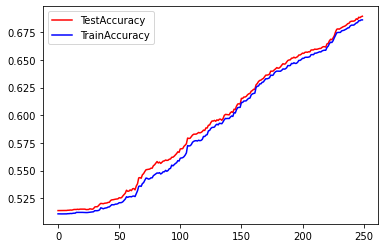

In [48]:
#Test and Train Accuracy
import matplotlib.pyplot as plt
plt.figure()
a = plt.subplot(111)
a.plot(test_acc,'r',label="TestAccuracy")
a.plot(train_acc, 'b',label="TrainAccuracy")
a.legend()
plt.show()

For k=40:

In [0]:
train_acc = []
test_acc = []

k= 40
d= 785 
w = np.random.normal(0, 0.01, k)
u = np.random.normal(0, 1/k, k*d).reshape(k,d)
N = 50000
learning_rate= 0.001  

iteration_number= 5
for it in range(iteration_number):
    grad_w=0
    grad_u=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)
    for i in indices:
        gw,gu=get_grad_logistic(w,u,y_train[i],x_train[i])
        grad_w=gw
        grad_u=gu
        w=w-eta*grad_w
        u=u-eta*grad_u

        if(i % 1000 == 0):
          y_hat_test=predict(w,u,x_test.T)>0.5+0
          y_hat_train = predict(w,u,x_train.T)>0.5+0
          train_acc.append(accuracy_score(y_hat_train, y_train ))
          test_acc.append(accuracy_score(y_hat_test, y_test ))

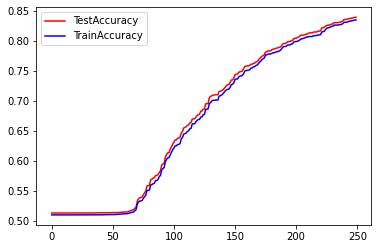

In [50]:
#Test and Train Accuracy
import matplotlib.pyplot as plt
plt.figure()
a = plt.subplot(111)
a.plot(test_acc,'r',label="TestAccuracy")
a.plot(train_acc, 'b',label="TrainAccuracy")
a.legend()
plt.show()

For k=200:

In [0]:
train_acc = []
test_acc = []

k= 200
d= 785 
w = np.random.normal(0, 0.01, k)
u = np.random.normal(0, 1/k, k*d).reshape(k,d)
N = 50000
learning_rate= 0.001  

iteration_number= 5
for it in range(iteration_number):
    grad_w=0
    grad_u=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)
    for i in indices:
        gw,gu=get_grad_logistic(w,u,y_train[i],x_train[i])
        grad_w=gw
        grad_u=gu
        w=w-eta*grad_w
        u=u-eta*grad_u

        if(i % 1000 == 0):
          y_hat_test=predict(w,u,x_test.T)>0.5+0
          y_hat_train = predict(w,u,x_train.T)>0.5+0
          train_acc.append(accuracy_score(y_hat_train, y_train ))
          test_acc.append(accuracy_score(y_hat_test, y_test ))

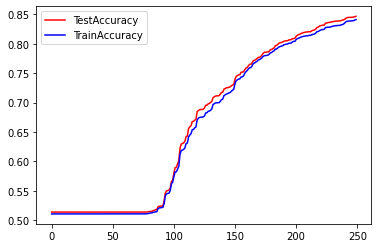

In [52]:
#Test and Train Accuracy
import matplotlib.pyplot as plt
plt.figure()
a = plt.subplot(111)
a.plot(test_acc,'r',label="TestAccuracy")
a.plot(train_acc, 'b',label="TrainAccuracy")
a.legend()
plt.show()